<a href="https://colab.research.google.com/github/juancferreyrar/Perceived-Gender-Differences-on-Love-/blob/main/PerceivedGenderDifferencesonLove.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gender Psychology Research Analysis
By: Juan Carlos Ferreyra

Importing Libraries for Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re


df = pd.read_excel("Perceived Gender Differences on Love Perception (Responses).xlsx")

df = df[['What is your gender?','On a scale from 1 to 5, how important do you think love is in a romantic relationship?',
        'How would you rate your ability to express love in a relationship?',
        'How would you rate your ability to communicate in a relationship?',
        'What is the most important factor in defining love?',
        'What is the second most important factor in defining love (Please do not chose the same option as the previous question)?',
        'In your opinion, which sex is more likely to initiate expressions of love in a relationship?',
        'Reflecting on your own upbringing, how do you believe your family\'s demonstration of love has influenced your perception of romantic love?',
        'What love language best describes what you are mainly looking for in a relationship?',
        'What love language best describes what you believe you provide to others?',
        'In your experience, how has technology (such as social media, dating apps) impacted the way people perceive and experience love?',
        'In three different words, please describe providing love, separated by a comma (ex. one,two,three)',
        'In three different words, please describe receiving love, separated by a comma (ex. one,two,three)',
        'Are you a Tom or a Summer?']]

Check for Nulls

In [ ]:
print(df.isnull().sum())

What is your gender?                                                                                                                          0
On a scale from 1 to 5, how important do you think love is in a romantic relationship?                                                        0
How would you rate your ability to express love in a relationship?                                                                            0
How would you rate your ability to communicate in a relationship?                                                                             0
What is the most important factor in defining love?                                                                                           0
What is the second most important factor in defining love (Please do not chose the same option as the previous question)?                     0
In your opinion, which sex is more likely to initiate expressions of love in a relationship?                                            

Count of Participants by Gender

In [ ]:
gender_counts = df['What is your gender?'].value_counts()

male_count = gender_counts.get('Male', 0)
female_count = gender_counts.get('Female', 0)
non_binary_count = gender_counts.get('Non-Binary', 0)

print("Number of Men:", male_count)
print("Number of Women:", female_count)
print("Number of Non-Binary:", non_binary_count)

Number of Men: 19
Number of Women: 28
Number of Non-Binary: 2


Verify Data

In [ ]:
df.head(10)

,What is your gender?,"On a scale from 1 to 5, how important do you think love is in a romantic relationship?",How would you rate your ability to express love in a relationship?,How would you rate your ability to communicate in a relationship?,What is the most important factor in defining love?,What is the second most important factor in defining love (Please do not chose the same option as the previous question)?,"In your opinion, which sex is more likely to initiate expressions of love in a relationship?","Reflecting on your own upbringing, how do you believe your family's demonstration of love has influenced your perception of romantic love?",What love language best describes what you are mainly looking for in a relationship?,What love language best describes what you believe you provide to others?,"In your experience, how has technology (such as social media, dating apps) impacted the way people perceive and experience love?","In three different words, please describe providing love, separated by a comma (ex. one,two,three)","In three different words, please describe receiving love, separated by a comma (ex. one,two,three)",Are you a Tom or a Summer?
0,Male,5,3,4,Physical attraction,Emotional connection,Men,It has somewhat influenced my perception,"Quality Time (Create special moments, Take Wal...",Acts of Service (Partner going out of their wa...,It has both positive and negative effects on l...,"Communication, commitment, consistency","Attention, commitment, value in person",What is that?
1,Male,4,4,3,Communication,Shared values and interests,Men,It has significantly shaped my perception,"Physical Touch (Hugs, Kisses, Cuddles)","Quality Time (Create special moments, Take Wal...",It has diluted the meaning of love and made re...,"Patience, Work, Fun","Nice, Occasionally uncomfortable, good",Tom
2,Male,5,3,3,Emotional connection,Physical attraction,Men,It has significantly shaped my perception,"Physical Touch (Hugs, Kisses, Cuddles)","Quality Time (Create special moments, Take Wal...",It has both positive and negative effects on l...,"Beauty, companionship, pleasure","Beauty, companionship, pleasure",Tom
3,Male,5,3,3,Shared values and interests,Emotional connection,Both Equally,It has significantly shaped my perception,"Physical Touch (Hugs, Kisses, Cuddles)",Acts of Service (Partner going out of their wa...,It has diluted the meaning of love and made re...,.,.,What is that?
4,Male,5,4,4,Shared values and interests,Physical attraction,Men,It has significantly shaped my perception,"Quality Time (Create special moments, Take Wal...",Acts of Service (Partner going out of their wa...,It has both positive and negative effects on l...,"caring, helping, hugging","smiling, thanking, acknowledging",What is that?
5,Female,5,5,5,Communication,Emotional connection,Men,It has somewhat influenced my perception,"Quality Time (Create special moments, Take Wal...","Quality Time (Create special moments, Take Wal...",It has both positive and negative effects on l...,"Hugs, Compliments, affectionate","Hugs, Words of affirmation, Quality time",What is that?
6,Female,5,4,5,Communication,Mutual respect,Women,It has significantly shaped my perception,"Quality Time (Create special moments, Take Wal...","Quality Time (Create special moments, Take Wal...",It has both positive and negative effects on l...,"Listening, Affection, Compassion","Encouragement, Loyalty, Commitment",What is that?
7,Male,3,3,4,Shared values and interests,Communication,Both Equally,It has somewhat influenced my perception,"Receiving Gifts (Thoughtfulness, Gifts, Gestures)","Receiving Gifts (Thoughtfulness, Gifts, Gestures)",It has both positive and negative effects on l...,"Gift Giving, Mutual Respect, Communications","Personal Attention, Gift Giving and Communication",What is that?
8,Male,5,4,3,Emotional connection,Mutual respect,Both Equally,It has significantly shaped my perception,"Physical Touch (Hugs, Kisses, Cuddles)","Quality Time (Create special moments, Take Wal..."

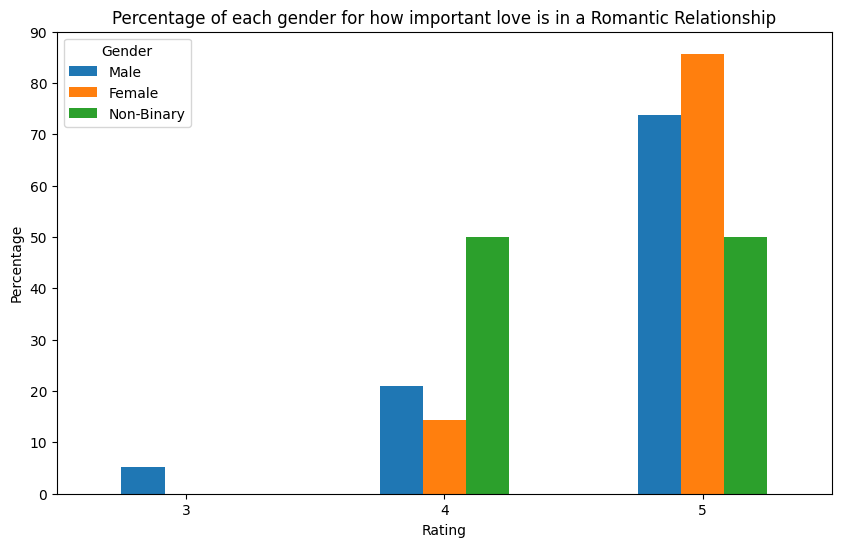

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary = df[df['What is your gender?'] == 'Non-Binary']

male_percentage = male_responses['On a scale from 1 to 5, how important do you think love is in a romantic relationship?'].value_counts(normalize=True) * 100
female_percentage = female_responses['On a scale from 1 to 5, how important do you think love is in a romantic relationship?'].value_counts(normalize=True) * 100
non_binary_percentage = non_binary['On a scale from 1 to 5, how important do you think love is in a romantic relationship?'].value_counts(normalize=True) * 100

data = pd.DataFrame({
    'On a scale from 1 to 5,how important do you think love is in a romantic relationship?': range(3, 6),
    'Male': male_percentage.sort_index(),
    'Female': female_percentage.sort_index(),
    'Non-Binary' : non_binary_percentage.sort_index()})

data.plot(x='On a scale from 1 to 5,how important do you think love is in a romantic relationship?' , kind='bar', figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage of each gender for how important love is in a Romantic Relationship')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

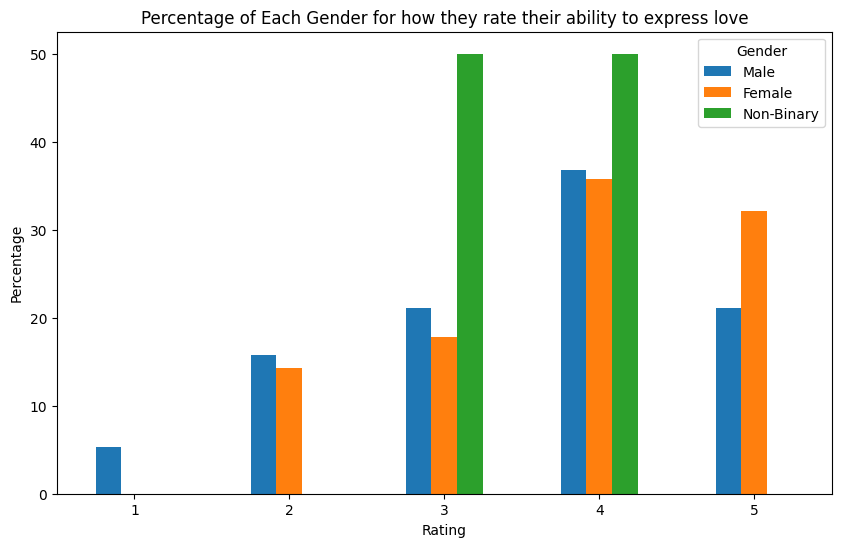

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']
male_percentage = male_responses['How would you rate your ability to express love in a relationship?'].value_counts(normalize=True) * 100
female_percentage = female_responses['How would you rate your ability to express love in a relationship?'].value_counts(normalize=True) * 100
non_binary_percentage = non_binary_responses['How would you rate your ability to express love in a relationship?'].value_counts(normalize=True) * 100

data = pd.DataFrame({
    'How would you rate your ability to express love in a relationship?': range(1, 6),
    'Male': male_percentage.sort_index(),
    'Female': female_percentage.sort_index(),
    'Non-Binary' : non_binary_percentage.sort_index()
})

data.plot(x='How would you rate your ability to express love in a relationship?' , kind='bar', figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage of Each Gender for how they rate their ability to express love')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()



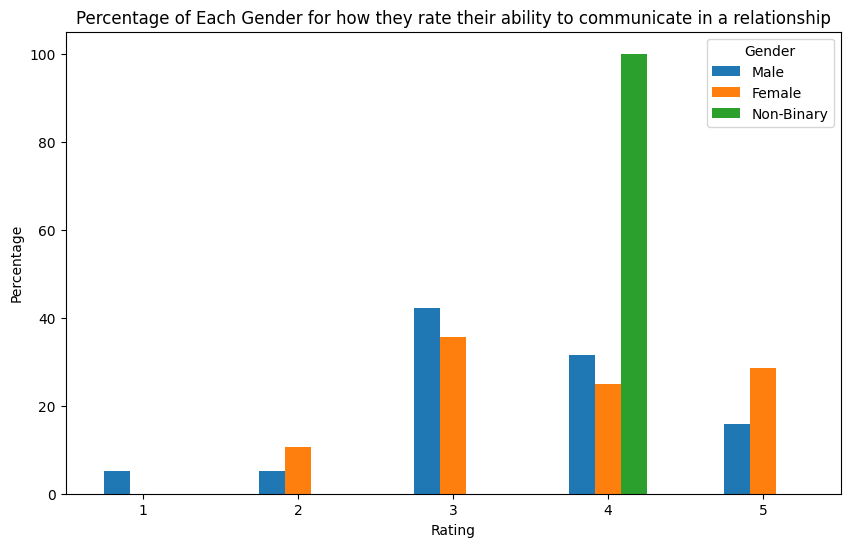

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']
male_percentage = male_responses['How would you rate your ability to communicate in a relationship?'].value_counts(normalize=True) * 100
female_percentage = female_responses['How would you rate your ability to communicate in a relationship?'].value_counts(normalize=True) * 100
non_binary_percentage = non_binary_responses['How would you rate your ability to communicate in a relationship?'].value_counts(normalize=True) * 100

data = pd.DataFrame({
    'How would you rate your ability to communicate in a relationship?': range(1, 6),
    'Male': male_percentage.sort_index(),
    'Female': female_percentage.sort_index(),
    'Non-Binary' : non_binary_percentage.sort_index()
})

data.plot(x='How would you rate your ability to communicate in a relationship?' , kind='bar', figsize=(10, 6))
plt.xlabel('Rating')
plt.ylabel('Percentage')
plt.title('Percentage of Each Gender for how they rate their ability to communicate in a relationship')
plt.xticks(rotation=0)
plt.legend(title='Gender')
plt.show()

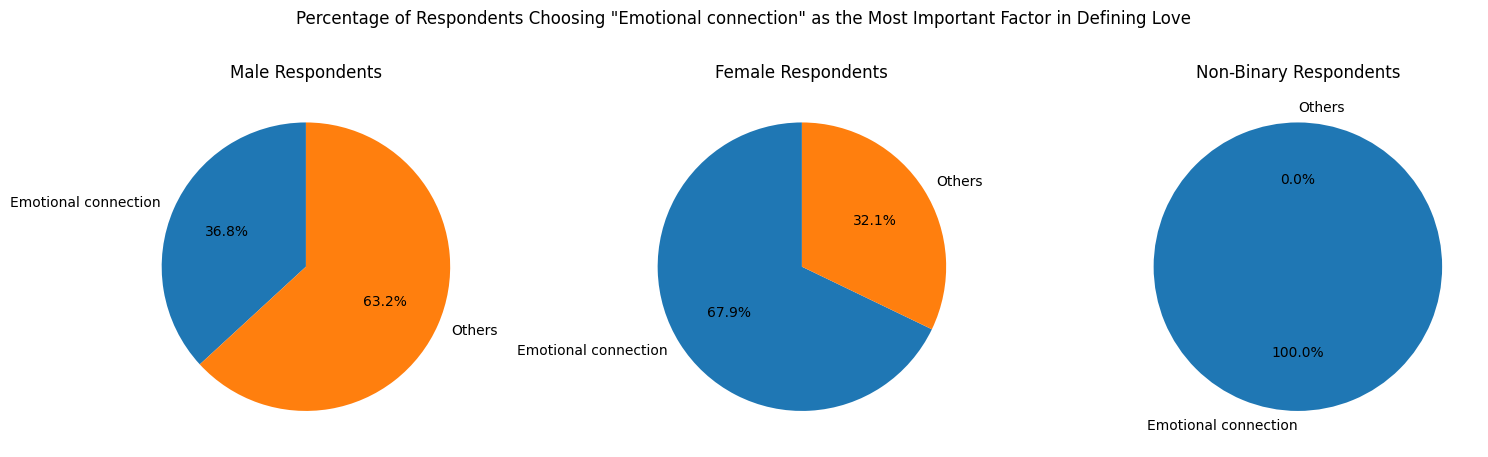

In [ ]:

male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']
male_emotional_connection = len(male_responses[male_responses['What is the most important factor in defining love?'] == 'Emotional connection'])
female_emotional_connection = len(female_responses[female_responses['What is the most important factor in defining love?'] == 'Emotional connection'])
non_binary_emotional_connection = len(non_binary_responses[non_binary_responses['What is the most important factor in defining love?'] == 'Emotional connection'])

total_males = len(male_responses)
total_females = len(female_responses)
total_non_binary = len(non_binary_responses)
male_percentage = (male_emotional_connection / total_males) * 100
female_percentage = (female_emotional_connection / total_females) * 100
non_binary_percentage = (non_binary_emotional_connection / total_non_binary) * 100

labels = ['Emotional connection', 'Others']
male_sizes = [male_percentage, 100 - male_percentage]
female_sizes = [female_percentage, 100 - female_percentage]
non_binary_sizes = [non_binary_percentage, 100 - non_binary_percentage]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(male_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

plt.suptitle('Percentage of Respondents Choosing "Emotional connection" as the Most Important Factor in Defining Love')
plt.tight_layout()
plt.show()

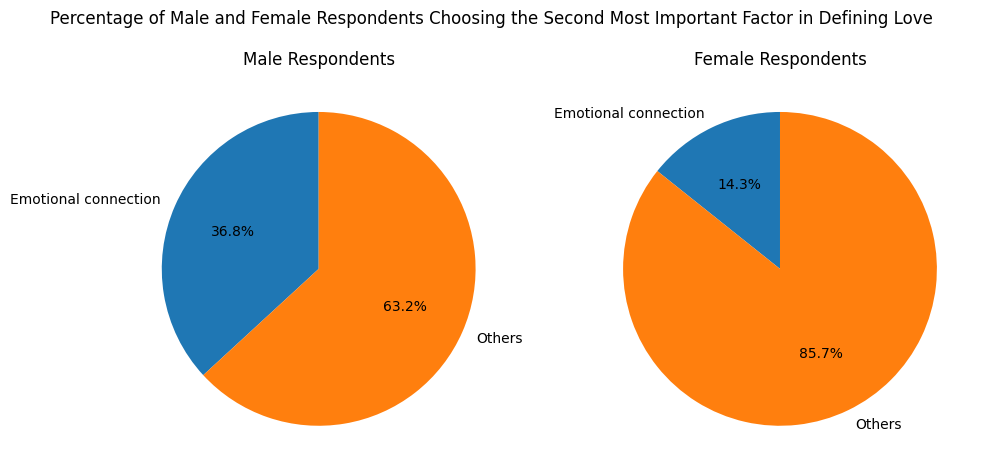

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']

male_second_factor = male_responses['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].value_counts().get('Emotional connection', 0)
female_second_factor = female_responses['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].value_counts().get('Emotional connection', 0)

total_males = len(male_responses)
total_females = len(female_responses)

male_percentage = (male_second_factor / total_males) * 100
female_percentage = (female_second_factor / total_females) * 100

labels = ['Emotional connection', 'Others']
male_sizes = [male_percentage, 100 - male_percentage]
female_sizes = [female_percentage, 100 - female_percentage]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(male_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')
plt.subplot(1, 2, 2)
plt.pie(female_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.suptitle('Percentage of Male and Female Respondents Choosing the Second Most Important Factor in Defining Love', x=0.5)
plt.tight_layout()
plt.show()

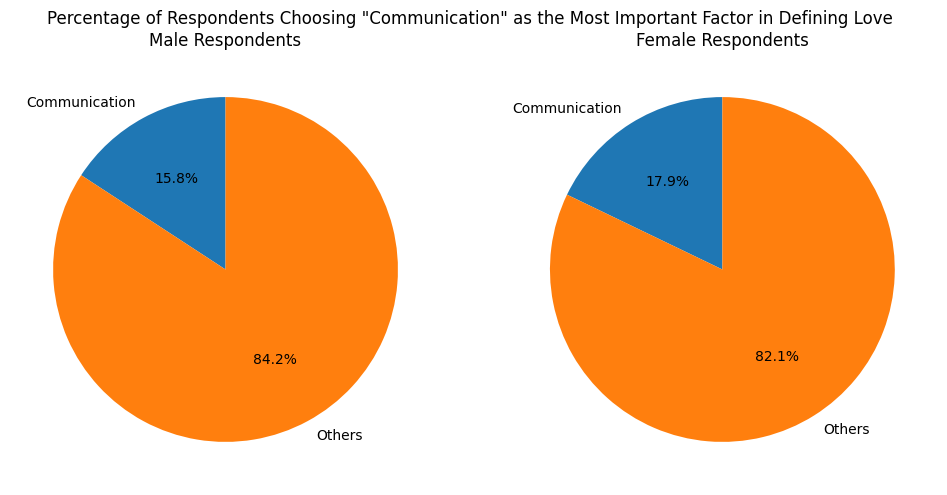

In [ ]:
male_communication = len(df[(df['What is your gender?'] == 'Male') & (df['What is the most important factor in defining love?'] == 'Communication')])
female_communication = len(df[(df['What is your gender?'] == 'Female') & (df['What is the most important factor in defining love?'] == 'Communication')])

total_males = len(df[df['What is your gender?'] == 'Male'])
total_females = len(df[df['What is your gender?'] == 'Female'])
male_percentage = (male_communication / total_males) * 100
female_percentage = (female_communication / total_females) * 100

labels = ['Communication', 'Others']
male_sizes = [male_percentage, 100 - male_percentage]
female_sizes = [female_percentage, 100 - female_percentage]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.pie(male_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 2, 2)
plt.pie(female_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.suptitle('Percentage of Respondents Choosing "Communication" as the Most Important Factor in Defining Love')
plt.tight_layout()
plt.show()

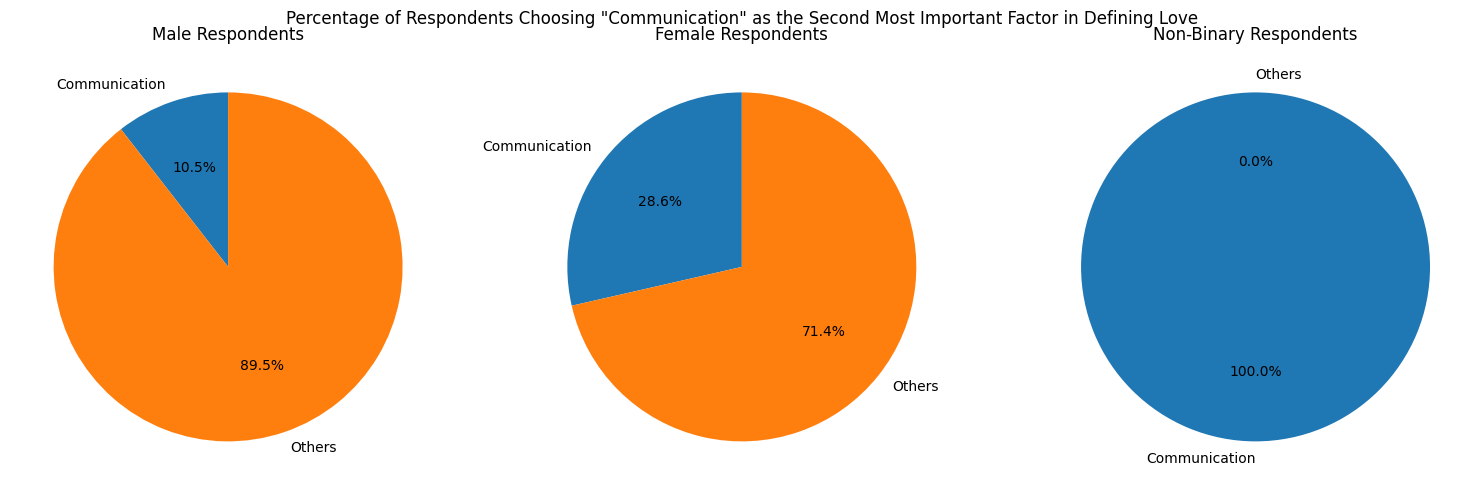

In [ ]:
male_communication = len(male_responses[male_responses['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'] == 'Communication'])
female_communication = len(female_responses[female_responses['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'] == 'Communication'])
non_binary_communication = len(non_binary_responses[non_binary_responses['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'] == 'Communication'])
male_percentage = (male_communication / total_males) * 100
female_percentage = (female_communication / total_females) * 100
non_binary_percentage = (non_binary_communication / total_non_binary) * 100

labels = ['Communication', 'Others']
male_sizes = [male_percentage, 100 - male_percentage]
female_sizes = [female_percentage, 100 - female_percentage]
non_binary_sizes = [non_binary_percentage, 100 - non_binary_percentage]

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(male_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

plt.suptitle('Percentage of Respondents Choosing "Communication" as the Second Most Important Factor in Defining Love')
plt.tight_layout()
plt.show()


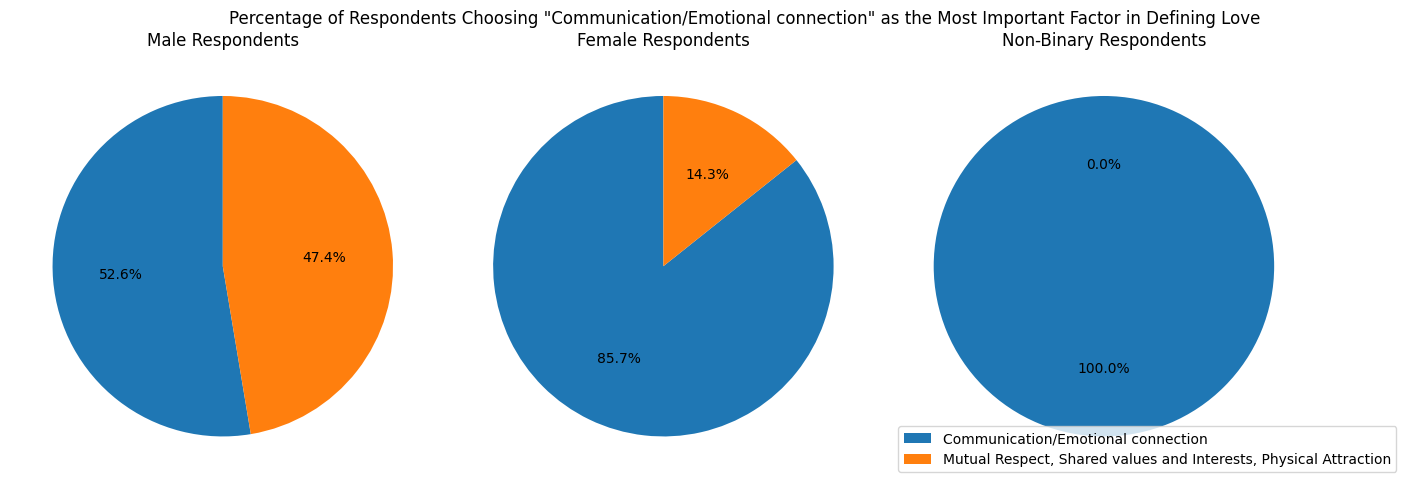

In [ ]:

male_communication_emotional = len(df[(df['What is your gender?'] == 'Male') & (df['What is the most important factor in defining love?'].isin(['Communication', 'Emotional connection']))])
female_communication_emotional = len(df[(df['What is your gender?'] == 'Female') & (df['What is the most important factor in defining love?'].isin(['Communication', 'Emotional connection']))])
non_binary_communication_emotional = len(df[(df['What is your gender?'] == 'Non-binary') & (df['What is the most important factor in defining love?'].isin(['Communication', 'Emotional connection']))])

male_others = len(df[(df['What is your gender?'] == 'Male') & (~df['What is the most important factor in defining love?'].isin(['Communication', 'Emotional connection']))])
female_others = len(df[(df['What is your gender?'] == 'Female') & (~df['What is the most important factor in defining love?'].isin(['Communication', 'Emotional connection']))])
non_binary_others = len(df[(df['What is your gender?'] == 'Non-binary') & (~df['What is the most important factor in defining love?'].isin(['Communication', 'Emotional connection']))])

total_males = len(df[df['What is your gender?'] == 'Male'])
total_females = len(df[df['What is your gender?'] == 'Female'])
total_non_binary = len(df[df['What is your gender?'] == 'Non-binary'])

male_communication_emotional_percentage = (male_communication_emotional / total_males) * 100
female_communication_emotional_percentage = (female_communication_emotional / total_females) * 100

male_others_percentage = (male_others / total_males) * 100
female_others_percentage = (female_others / total_females) * 100

male_sizes = [male_communication_emotional_percentage, male_others_percentage]
female_sizes = [female_communication_emotional_percentage, female_others_percentage]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(male_sizes,autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_sizes,  autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_sizes, autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

plt.legend(loc="lower left", labels=['Communication/Emotional connection', 'Mutual Respect, Shared values and Interests, Physical Attraction'])
plt.suptitle('Percentage of Respondents Choosing "Communication/Emotional connection" as the Most Important Factor in Defining Love')
plt.tight_layout()
plt.show()


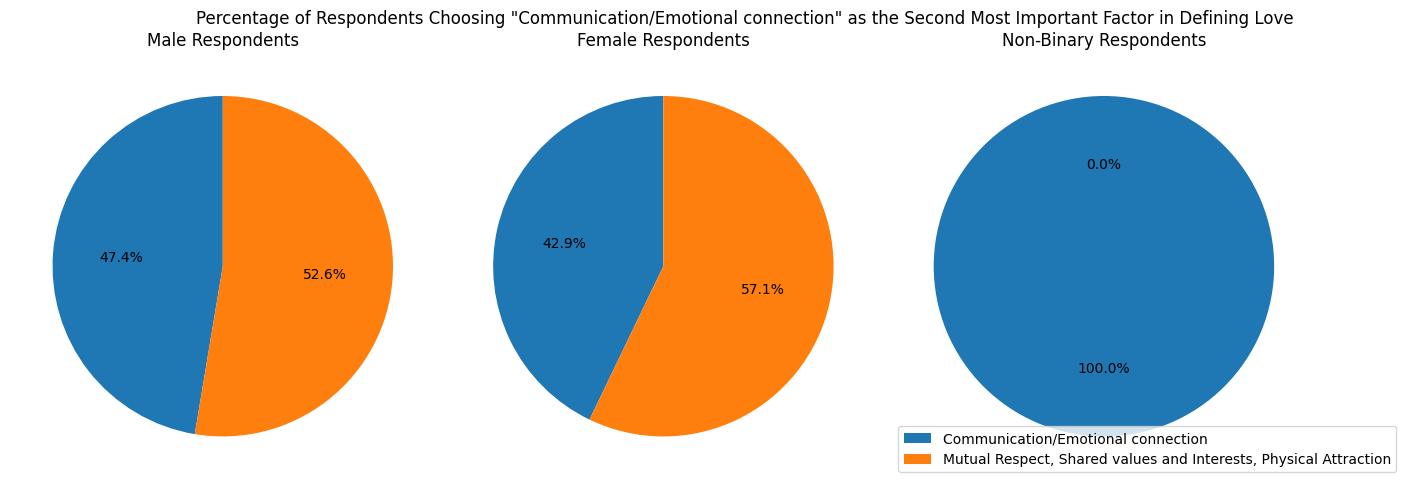

In [ ]:

male_communication_emotional = len(df[(df['What is your gender?'] == 'Male') & (df['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].isin(['Communication', 'Emotional connection']))])
female_communication_emotional = len(df[(df['What is your gender?'] == 'Female') & (df['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].isin(['Communication', 'Emotional connection']))])
non_binary_communication_emotional = len(df[(df['What is your gender?'] == 'Non-binary') & (df['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].isin(['Communication', 'Emotional connection']))])

male_others = len(df[(df['What is your gender?'] == 'Male') & (~df['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].isin(['Communication', 'Emotional connection']))])
female_others = len(df[(df['What is your gender?'] == 'Female') & (~df['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].isin(['Communication', 'Emotional connection']))])
non_binary_others = len(df[(df['What is your gender?'] == 'Non-binary') & (~df['What is the second most important factor in defining love (Please do not chose the same option as the previous question)?'].isin(['Communication', 'Emotional connection']))])

total_males = len(df[df['What is your gender?'] == 'Male'])
total_females = len(df[df['What is your gender?'] == 'Female'])
total_non_binary = len(df[df['What is your gender?'] == 'Non-binary'])

male_communication_emotional_percentage = (male_communication_emotional / total_males) * 100
female_communication_emotional_percentage = (female_communication_emotional / total_females) * 100

male_others_percentage = (male_others / total_males) * 100
female_others_percentage = (female_others / total_females) * 100

male_sizes = [male_communication_emotional_percentage, male_others_percentage]
female_sizes = [female_communication_emotional_percentage, female_others_percentage]
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(male_sizes,autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_sizes,  autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_sizes, autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

plt.legend(loc="lower left", labels=['Communication/Emotional connection', 'Mutual Respect, Shared values and Interests, Physical Attraction'])


plt.suptitle('Percentage of Respondents Choosing "Communication/Emotional connection" as the Second Most Important Factor in Defining Love')
plt.tight_layout()
plt.show()


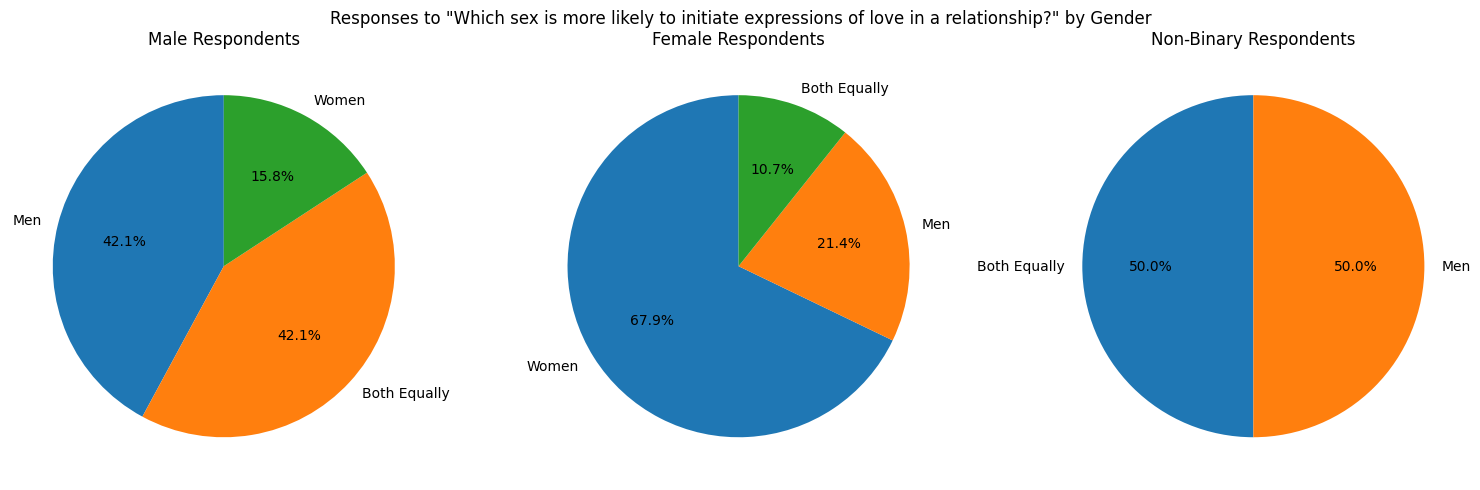

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']

male_counts = male_responses['In your opinion, which sex is more likely to initiate expressions of love in a relationship?'].value_counts()
female_counts = female_responses['In your opinion, which sex is more likely to initiate expressions of love in a relationship?'].value_counts()
non_binary_counts = non_binary_responses['In your opinion, which sex is more likely to initiate expressions of love in a relationship?'].value_counts()

labels = non_binary_counts.index.tolist()
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(male_counts, labels=male_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_counts, labels=female_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

plt.suptitle('Responses to "Which sex is more likely to initiate expressions of love in a relationship?" by Gender')
plt.tight_layout()
plt.show()

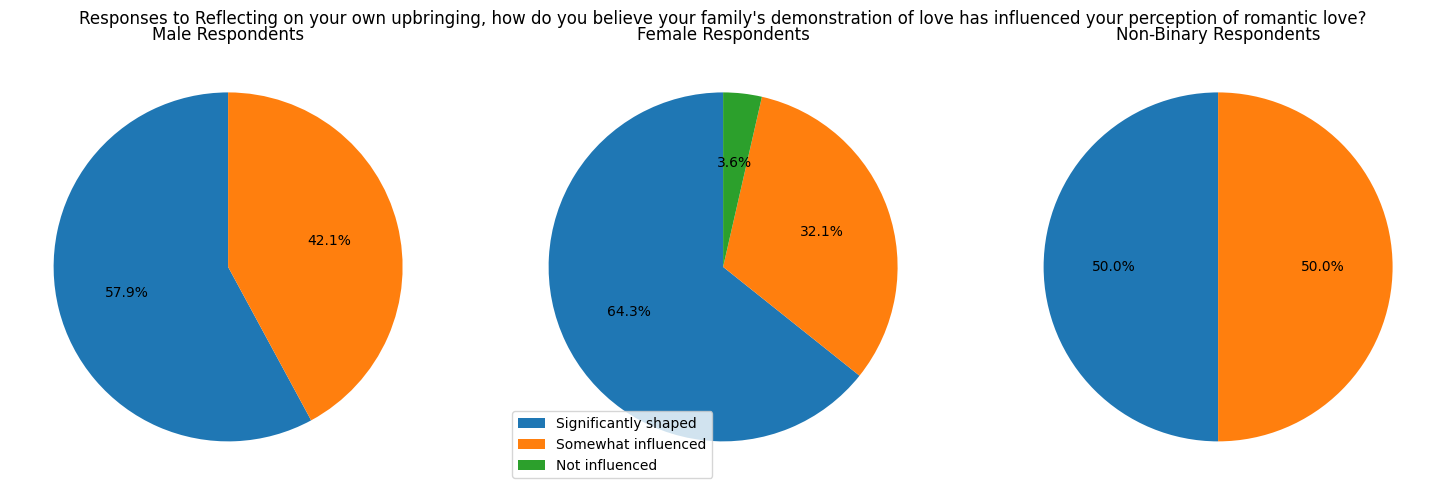

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']

male_counts = male_responses["Reflecting on your own upbringing, how do you believe your family's demonstration of love has influenced your perception of romantic love?"].value_counts()
female_counts = female_responses["Reflecting on your own upbringing, how do you believe your family's demonstration of love has influenced your perception of romantic love?"].value_counts()
non_binary_counts = non_binary_responses["Reflecting on your own upbringing, how do you believe your family's demonstration of love has influenced your perception of romantic love?"].value_counts()

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.pie(male_counts,  autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_counts, autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_counts,  autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

legend_labels = ["Significantly shaped", "Somewhat influenced", "Not influenced"]

plt.subplot(1, 3, 1)

plt.subplot(1, 3, 2)
plt.legend(loc="lower left", labels=legend_labels)

plt.subplot(1, 3, 3)

plt.suptitle("Responses to Reflecting on your own upbringing, how do you believe your family's demonstration of love has influenced your perception of romantic love?")
plt.tight_layout()
plt.show()

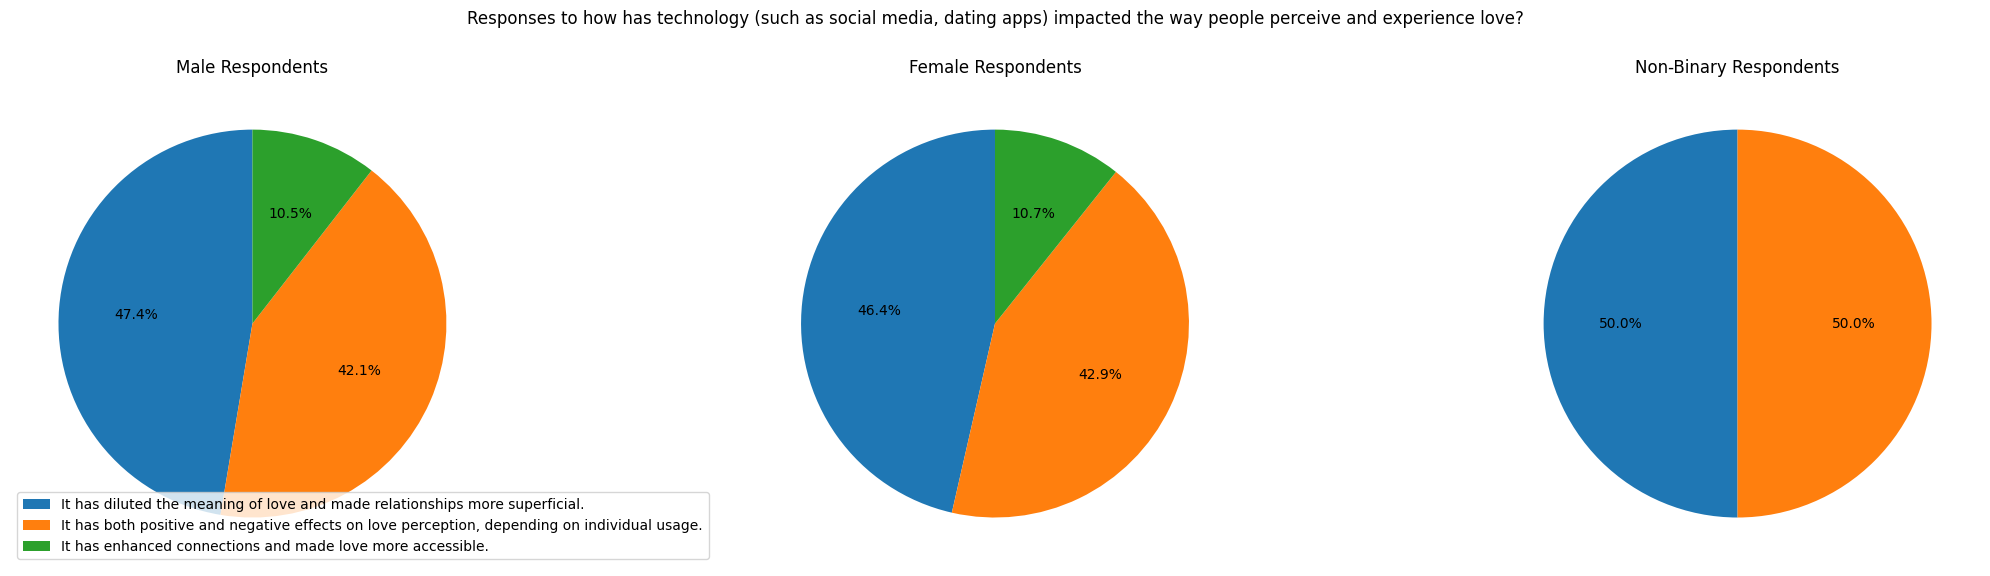

In [ ]:

male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']

male_counts = male_responses["In your experience, how has technology (such as social media, dating apps) impacted the way people perceive and experience love?"].value_counts()
female_counts = female_responses["In your experience, how has technology (such as social media, dating apps) impacted the way people perceive and experience love?"].value_counts()
non_binary_counts = non_binary_responses["In your experience, how has technology (such as social media, dating apps) impacted the way people perceive and experience love?"].value_counts()

plt.figure(figsize=(20, 6))

plt.subplot(1, 3, 1)
plt.pie(male_counts,  autopct='%1.1f%%', startangle=90)
plt.title('Male Respondents')
plt.legend(loc="lower left", labels=male_counts.index)

plt.subplot(1, 3, 2)
plt.pie(female_counts,  autopct='%1.1f%%', startangle=90)
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_counts, autopct='%1.1f%%', startangle=90)
plt.title('Non-Binary Respondents')

plt.suptitle("Responses to how has technology (such as social media, dating apps) impacted the way people perceive and experience love?")
plt.tight_layout()
plt.show()

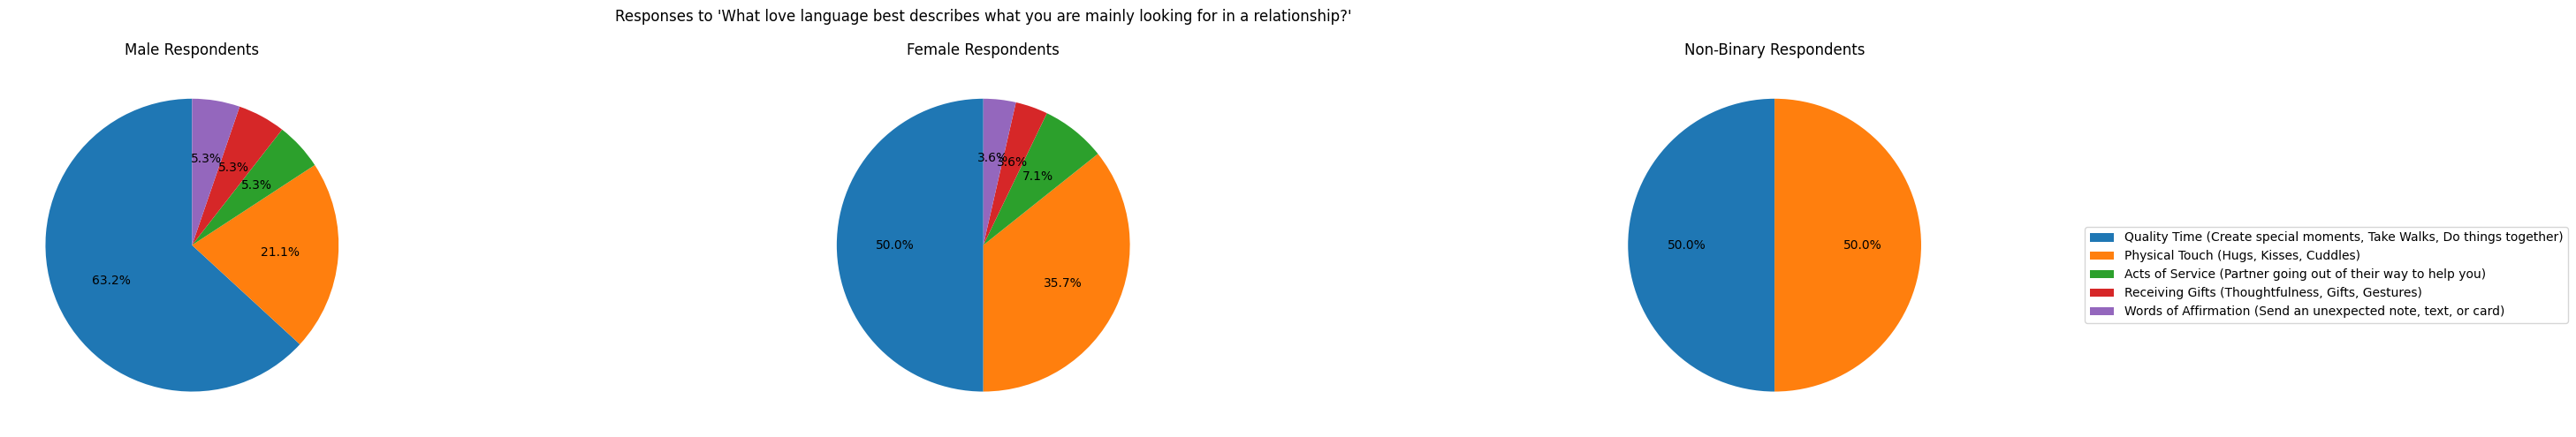

In [ ]:

male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']

male_counts = male_responses["What love language best describes what you are mainly looking for in a relationship?"].value_counts()
female_counts = female_responses["What love language best describes what you are mainly looking for in a relationship?"].value_counts()
non_binary_counts = non_binary_responses["What love language best describes what you are mainly looking for in a relationship?"].value_counts()

plt.figure(figsize=(30, 5))

plt.subplot(1, 3, 1)
plt.pie(male_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Female Respondents')

plt.subplot(1, 3, 3)
plt.pie(non_binary_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Non-Binary Respondents')

plt.suptitle("Responses to 'What love language best describes what you are mainly looking for in a relationship?'")

labels = female_counts.index
plt.figlegend(labels, loc='upper right', bbox_to_anchor=(1.1, 0.5))

plt.tight_layout()
plt.show()

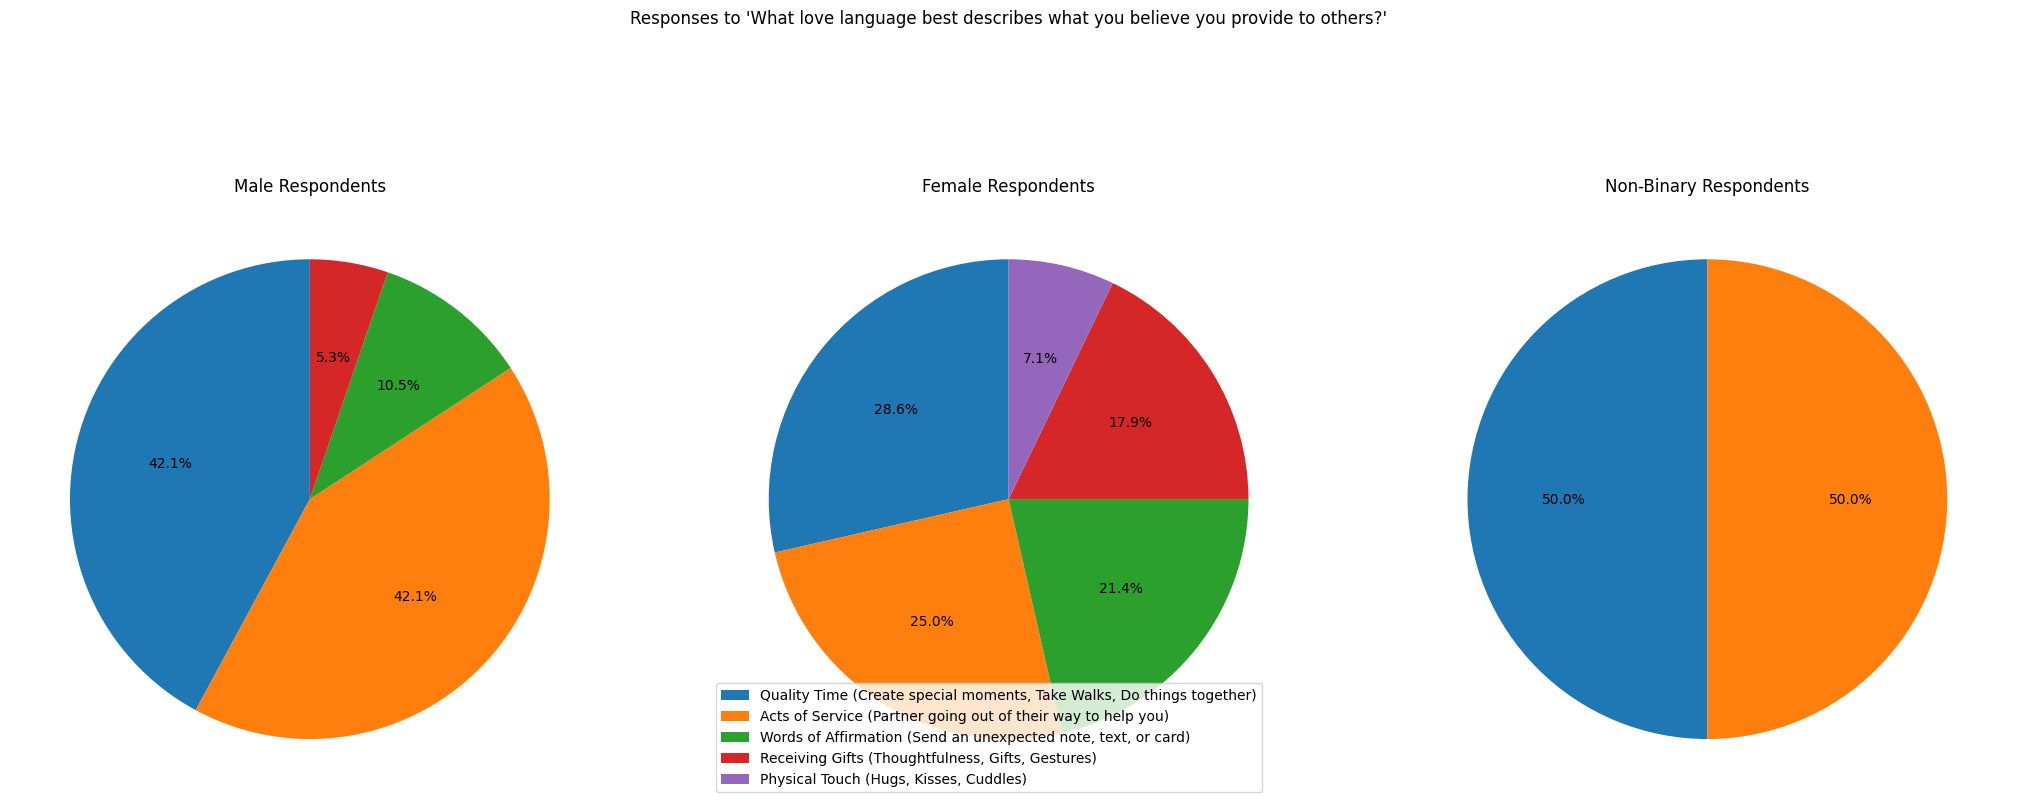

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']

male_counts = male_responses["What love language best describes what you believe you provide to others?"].value_counts(normalize=True)

female_counts = female_responses["What love language best describes what you believe you provide to others?"].value_counts(normalize=True)

non_binary_counts = non_binary_responses["What love language best describes what you believe you provide to others?"].value_counts(normalize=True)

plt.figure(figsize=(20,10))

plt.subplot(1, 3, 1)
plt.pie(male_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Male Respondents')

plt.subplot(1, 3, 2)
plt.pie(female_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Female Respondents')
plt.legend(labels=female_counts.index, loc="lower left")

plt.subplot(1, 3, 3)
plt.pie(non_binary_counts, autopct='%1.1f%%', startangle=90, textprops={'fontsize': 10})
plt.title('Non-Binary Respondents')

plt.suptitle("Responses to 'What love language best describes what you believe you provide to others?'")
plt.tight_layout(pad=0.1)
plt.show()


In [ ]:
column1_name = 'In three different words, please describe providing love, separated by a comma (ex. one,two,three)'  # Replace 'Your_Column1_Name' with the actual name of the first column
column2_name = 'In three different words, please describe receiving love, separated by a comma (ex. one,two,three)'  # Replace 'Your_Column2_Name' with the actual name of the second column
column1_responses = df[column1_name]
column2_responses = df[column2_name]

all_responses = ' '.join([response.lower() for response in column1_responses if isinstance(response, str)])
all_responses += ' ' + ' '.join([response.lower() for response in column2_responses if isinstance(response, str)])


words = all_responses.split(',')

word_counts = {}
for word in words:
    if word.strip() in word_counts:
        word_counts[word.strip()] += 1
    else:
        word_counts[word.strip()] = 1

sorted_word_counts = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

for word, count in sorted_word_counts.items():
    print(f'{word}: {count}')

respect: 6
understanding: 5
loyalty: 5
affirmation: 3
kindness: 3
effort: 3
communication: 2
commitment: 2
companionship: 2
compliments: 2
caring: 2
care: 2
reassurance: 2
am: 2
quality time: 2
fun: 2
warmth: 2
consistency patience: 1
work: 1
fun beauty: 1
pleasure . caring: 1
helping: 1
hugging hugs: 1
affectionate listening: 1
affection: 1
compassion gift giving: 1
mutual respect: 1
communications effort: 1
listening communication: 1
shelter: 1
passion physical affection: 1
emotional understanding: 1
communication caring: 1
thoughtful: 1
kindness attentive: 1
supportive attention: 1
thankfulness communication: 1
empathy happiness: 1
trust connection: 1
trust: 1
intimacy one: 1
two: 1
three respect: 1
connection: 1
values words of affirmation: 1
understanding i: 1
single kisses: 1
trust kissing: 1
complimenting: 1
respecting communication: 1
understanding caring: 1
respectful meaningful: 1
sacrifice: 1
safety caring: 1
tiring fulfilling: 1
secure: 1
soft caring: 1
listening: 1
underst

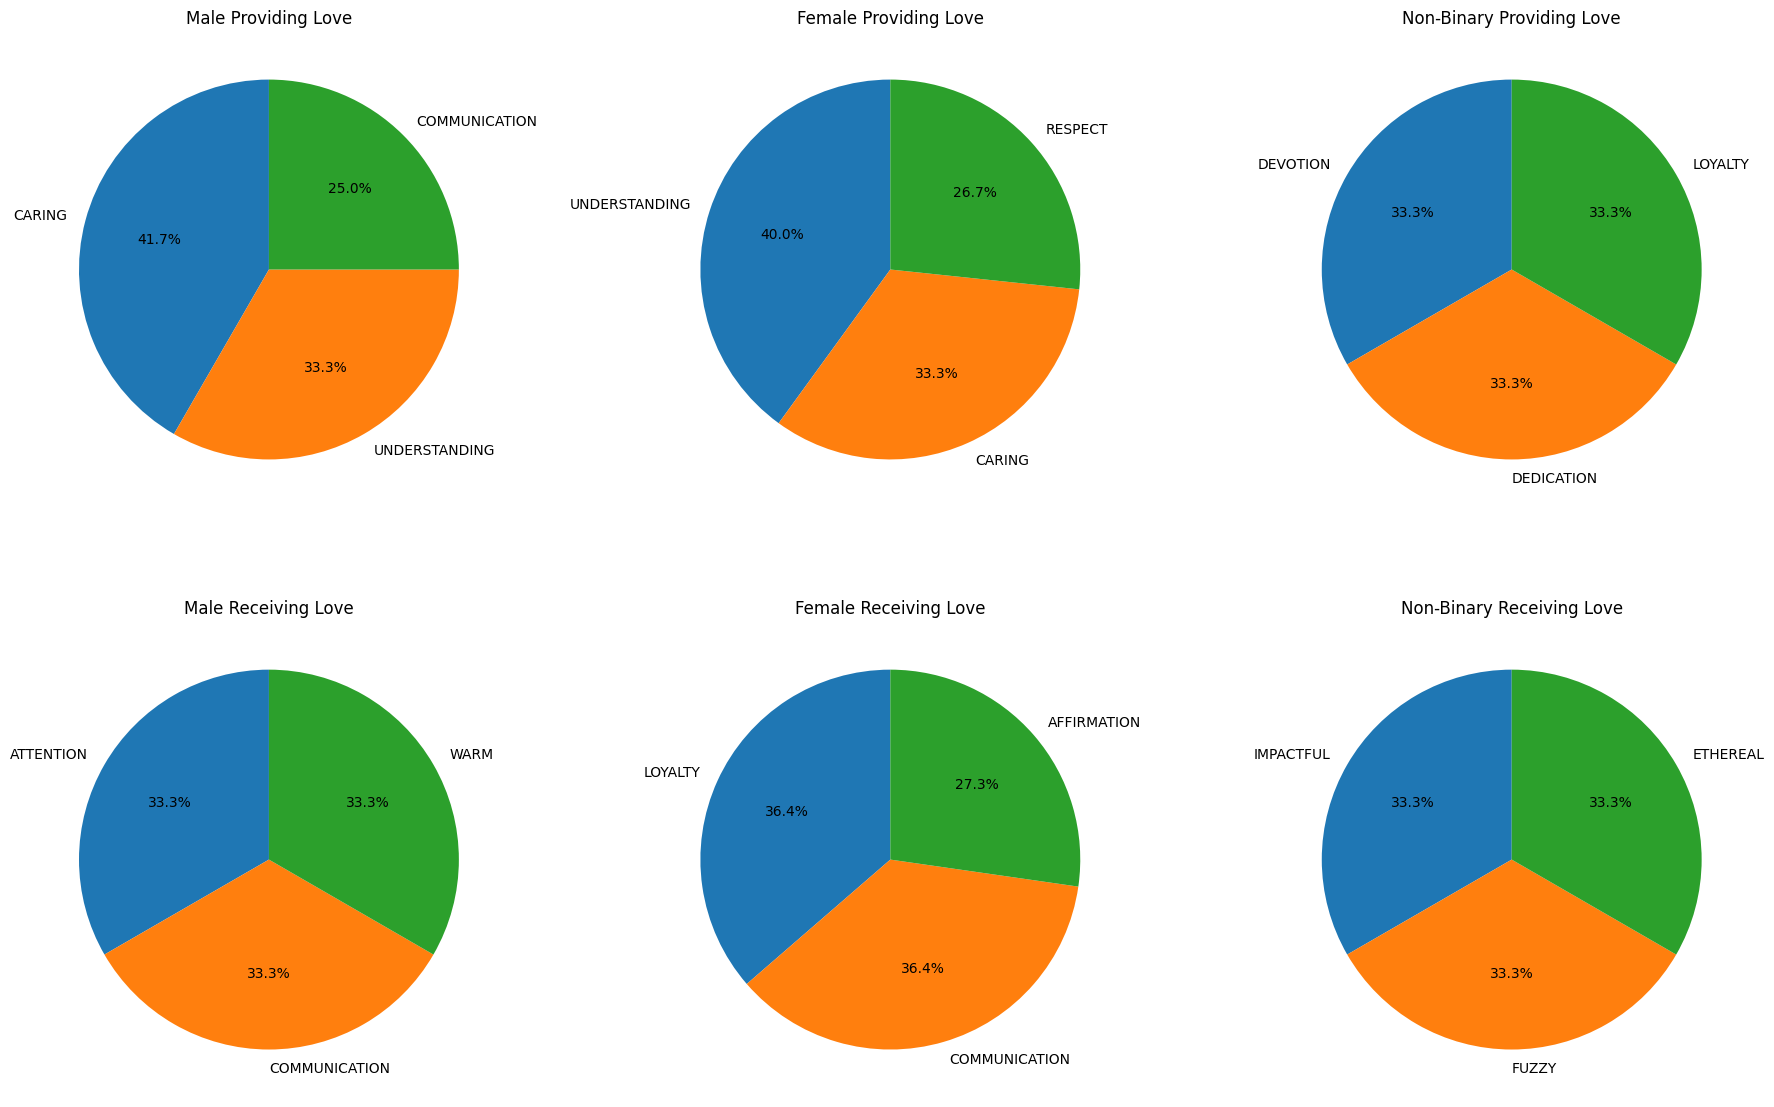

In [ ]:
male_responses = df[df['What is your gender?'] == 'Male']
female_responses = df[df['What is your gender?'] == 'Female']
non_binary_responses = df[df['What is your gender?'] == 'Non-Binary']

def count_words(responses):
    word_counts = {}
    for response in responses:
        if isinstance(response, str):
            words = re.findall(r'\b(?!and\b)\w+\b', response.lower())
            for word in words:
                word_counts[word.upper()] = word_counts.get(word.upper(), 0) + 1
    return word_counts

male_providing_counts = count_words(male_responses["In three different words, please describe providing love, separated by a comma (ex. one,two,three)"])
female_providing_counts = count_words(female_responses["In three different words, please describe providing love, separated by a comma (ex. one,two,three)"])
non_binary_providing_counts = count_words(non_binary_responses["In three different words, please describe providing love, separated by a comma (ex. one,two,three)"])

male_receiving_counts = count_words(male_responses["In three different words, please describe receiving love, separated by a comma (ex. one,two,three)"])
female_receiving_counts = count_words(female_responses["In three different words, please describe receiving love, separated by a comma (ex. one,two,three)"])
non_binary_receiving_counts = count_words(non_binary_responses["In three different words, please describe receiving love, separated by a comma (ex. one,two,three)"])

def plot_pie_chart(title, word_counts):
    sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)
    top_words = dict(sorted_counts[:3])
    plt.pie(top_words.values(), labels=top_words.keys(), autopct='%1.1f%%', startangle=90)
    plt.title(title)

plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
plot_pie_chart('Male Providing Love', male_providing_counts)
plt.subplot(2, 3, 2)
plot_pie_chart('Female Providing Love', female_providing_counts)
plt.subplot(2, 3, 3)
plot_pie_chart('Non-Binary Providing Love', non_binary_providing_counts)
plt.subplot(2, 3, 4)
plot_pie_chart('Male Receiving Love', male_receiving_counts)
plt.subplot(2, 3, 5)
plot_pie_chart('Female Receiving Love', female_receiving_counts)

plt.subplot(2, 3, 6)
plot_pie_chart('Non-Binary Receiving Love', non_binary_receiving_counts)

plt.tight_layout()
plt.show()